# R00182510 - Assignment1 PART A - Task 2 (i)

In [0]:
# To enable TF2
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)


2.2.0-rc2


In [0]:
# import required libraries
import tensorflow as tf
from keras.utils import np_utils
import matplotlib.pyplot as plt
import random

random.seed(182510)

# load and prepare the training and test data
def load_Prepare_Data():
    fashion_mnist = tf.keras.datasets.fashion_mnist

    # load the training and test data    
    (tr_x, tr_y), (te_x, te_y) = fashion_mnist.load_data()

    # reshape the feature data
    tr_x = tr_x.reshape(tr_x.shape[0], 784)
    te_x = te_x.reshape(te_x.shape[0], 784)

    # noramlise feature data
    tr_x = tr_x / 255.0
    te_x = te_x / 255.0

    print( "Shape of training features ", tr_x.shape)
    print( "Shape of test features ", te_x.shape)


    # one hot encode the training labels and get the transpose
    tr_y = np_utils.to_categorical(tr_y,10)
    tr_y = tr_y.T
    print ("Shape of training labels ", tr_y.shape)

    # one hot encode the test labels and get the transpose
    te_y = np_utils.to_categorical(te_y,10)
    te_y = te_y.T
    print ("Shape of testing labels ", te_y.shape)
    
    # Reshape the training data and test data so 
    # that the features becomes the rows of the matrix
    tr_x = tr_x.T
    te_x = te_x.T

    print("Reshaped training data ", tr_x.shape)
    print("Reshaped test data ",te_x.shape)
    
    return(tr_x, tr_y, te_x, te_y)

Using TensorFlow backend.


In [0]:
# push all training data through the hidden layer and the SoftMax layer
def forward_pass(x, w_T1, b1, w_T2, b2):
    
    # Multiply each training example by the weights and add the bias for the 1st hidden layer
    A1 = tf.matmul(w_T1, x) + b1
    # ReLu activation
    H1 = tf.nn.relu(A1)
    
    # Multiply each training example by the weights and add the bias for the SoftMax layer
    A2 = tf.matmul(w_T2, H1) + b2
    
    #SoftMax activation
    t = tf.math.exp(A2)
    t_sum = tf.reduce_sum(t, 0)
    t_sum = tf.reshape(t_sum,[1, -1])

    y_pred_softmax = tf.divide(t, t_sum)

    return y_pred_softmax


In [0]:
def cross_entropy(y, y_pred):

   # Calculate the cross entropy error for all training data 
    cross_entropy_loss = -(tf.reduce_sum(tf.multiply(y, tf.math.log(y_pred)), 0))
    
    # Calculate cost which is the mean cross entropy error/ average loss across all training instances
    cost = tf.reduce_mean(cross_entropy_loss)
    
    return cost

In [0]:
def calculate_accuracy(y, y_pred_softmax):

    # Calculate the predictions in the form of a boolean array, by considering only the class with the highest probability
    # 1 if True (correct prediction), 0 if False (incorrect prediction)
    predictions_bool = tf.equal(tf.argmax(y_pred_softmax, 0), tf.argmax(y, 0))
    predictions_correct = tf.cast(predictions_bool, tf.float32)

    # Finally, we just determine the mean value of the correct predictions
    accuracy = tf.reduce_mean(predictions_correct)
  
    return accuracy

Shape of training features  (60000, 784)
Shape of test features  (10000, 784)
Shape of training labels  (10, 60000)
Shape of testing labels  (10, 10000)
Reshaped training data  (784, 60000)
Reshaped test data  (784, 10000)
Iteration  0 : Train Loss =  2.374438   Train Acc:  0.057733335   Validation Loss =  2.3740351   Validation Acc:  0.0583
Iteration  1 : Train Loss =  2.0594566   Train Acc:  0.35171667   Validation Loss =  2.0603015   Validation Acc:  0.3485
Iteration  2 : Train Loss =  1.824994   Train Acc:  0.5128   Validation Loss =  1.8272556   Validation Acc:  0.511
Iteration  3 : Train Loss =  1.6307257   Train Acc:  0.59795   Validation Loss =  1.6345384   Validation Acc:  0.5935
Iteration  4 : Train Loss =  1.4661934   Train Acc:  0.6369   Validation Loss =  1.471697   Validation Acc:  0.6332
Iteration  5 : Train Loss =  1.327599   Train Acc:  0.65056664   Validation Loss =  1.3344256   Validation Acc:  0.643
Iteration  6 : Train Loss =  1.210626   Train Acc:  0.6591333   Val

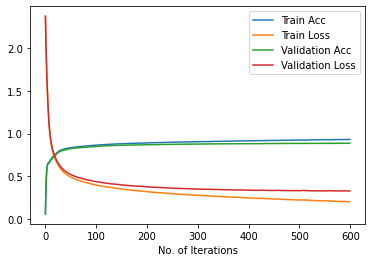

In [0]:
def main():
    num_Iterations = 600
    adam_optimizer = tf.keras.optimizers.Adam()
    train_accuracy = []
    train_loss = []
    validation_accuracy = []
    validation_loss = []

    # load and prepare the training and test data
    tr_x, tr_y, te_x, te_y = load_Prepare_Data()
    
    # To avoid problems related to type conversion, all data is converted to  float32 data types
    tr_x = tf.cast(tr_x, tf.float32)
    te_x = tf.cast(te_x, tf.float32)
    tr_y = tf.cast(tr_y, tf.float32)
    te_y = tf.cast(te_y, tf.float32)
    
    #Initialize the values of the weights and bias for the 1st hidden layer
    w1 = tf.Variable(tf.random.normal([ 300, tr_x.shape[0]], mean=0.0, stddev=0.05))
    b1 = tf.Variable(tf.zeros([300, 1]))
    #Initialize the values of the weights and bias for the SoftMax layer
    w2 = tf.Variable(tf.random.normal([ tr_y.shape[0], 300], mean=0.0, stddev=0.05))
    b2 = tf.Variable(tf.zeros([tr_y.shape[0], 1]))
    
    # Iterate the training loop
    for i in range(num_Iterations):
        
        # Create an instance of Gradient Tape to monitor the forward pass to calcualte the gradients based on the training data
        with tf.GradientTape() as tape:
            y_pred = forward_pass(tr_x, w1, b1, w2, b2)
            currentLoss = cross_entropy(tr_y, y_pred)
        
        # Calculate the gradients
        gradients = tape.gradient(currentLoss, [w1, b1, w2, b2])
        # Determine the prediction accuracy for the training data
        accuracy = calculate_accuracy(tr_y, y_pred)

        train_accuracy.append(accuracy)
        train_loss.append(currentLoss)

        # Calculate forward pass, loss and accuracy for the valdation data
        te_y_pred = forward_pass(te_x, w1, b1, w2, b2) 
        te_currentLoss = cross_entropy(te_y, te_y_pred)
        te_accuracy = calculate_accuracy(te_y, te_y_pred) 
        validation_accuracy.append(te_accuracy)
        validation_loss.append(te_currentLoss)

        print ("Iteration ", i, ": Train Loss = ",currentLoss.numpy(), "  Train Acc: ", accuracy.numpy(), "  Validation Loss = ", te_currentLoss.numpy(), "  Validation Acc: ", te_accuracy.numpy())
        # Update the trainable parameters using Adam Optimizer
        adam_optimizer.apply_gradients(zip(gradients, [w1, b1, w2, b2]))
        
    # Plot the training and the validation accuracy and loss
    plt.plot(train_accuracy, label="Train Acc")
    plt.plot(train_loss, label="Train Loss")
    plt.plot(validation_accuracy, label="Validation Acc")
    plt.plot(validation_loss, label="Validation Loss")
    plt.xlabel("No. of Iterations")
    plt.legend()
    
    plt.show();


main()